DTW(Dynamic Time Warping)/動的時間伸縮法について話す(https://qiita.com/hcpmiyuki/items/251586526c5924f09aa3)

最近時系列分析を勉強していて、時系列同士の類似度を測る際にDTWという手法を学んだのでゆるくまとめてみようと思います。今回は説明編、次回を実践編としたいです。

### DTW(Dynamic Time Warping)/動的時間伸縮法とは
DTWとは時系列データ同士の類似度を測る際に用いる手法です。波形の類似度を求める手法としてはユークリッド距離やコサイン距離等があるかと思います。
DTWは２つの時系列の各点の距離(誤差の絶対値)を総当たりで求め、全て求めた上で２つの時系列が最短となるパスを見つけます。
対応する点を選ぶ際に重複を許す（その時点までに選択済みの点も選択できる）ため、時系列同士の長さや周期が違っても類似度を求めることができます。
なので、DTWは「周期はずれているが、形は似ている」という場合や、系列同士の長さが異なるデータの類似度を測りたいときに他の手法よりも便利な手法だと言えます。

### ライブラリで試す
jupyter notebook上での実行を想定し、デモをしてみようと思います。
PythonにはDTWをするためのライブラリがいくつかありますが、今回は「fastdtw」というものを用います。fastらしいので。
お気づきかとは思いますが、各点を総当たりで計算するという点でDTWは結構計算量がかかる手法になってきます。実際にクラスタリング等で用いるとなると更に計算量が必要になるので頑張りましょう。こちらのサイトの計算シミュレーションがめちゃくちゃわかりやすいのです。

In [1]:
from fastdtw import fastdtw
import matplotlib.pyplot as plt
# グラフを横長固定（お好みで）
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

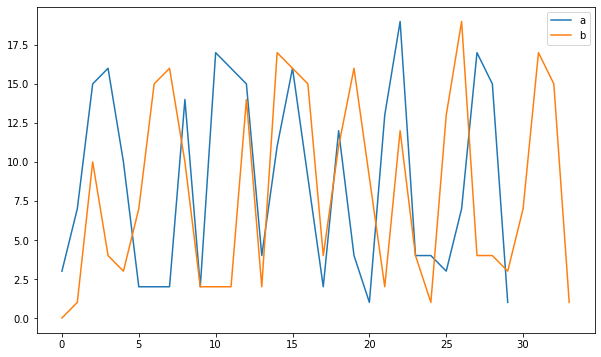

In [2]:
# データ作成
from numpy.random import *

seed(100)
rand()

a = list(randint(0, 20, 30))
# bはaを少しだけずらしたデータにする
b = [0, 1, 10, 4] + a

plt.plot(a, label="a")
plt.plot(b, label="b")
plt.legend()
plt.show()

デモ用のデータは、DTWの利点がわかりやすいように、似ているかつ長さが異なるデータにしましたが、どんなデータでも問題ないです。
それでは実際にDTWを用いて類似度を計算してみます

In [3]:
distance, path = fastdtw(a, b)
distance

# 出力
37.0

37.0

これだけではよくわからないので、各点がどのように対応する結果になったのかを図示します。
fastdtwは計算した距離と一緒に選択したパスをタプルで返してくれるので、それを利用します。

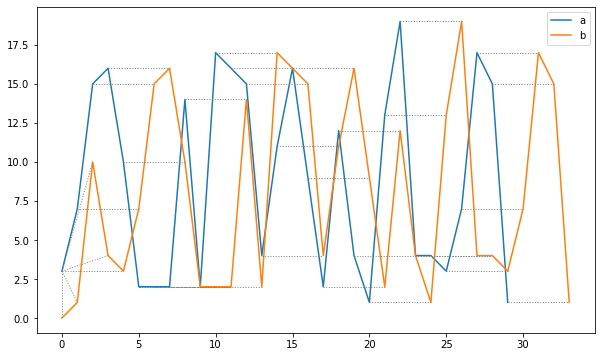

In [4]:
plt.plot(a, label="a")
plt.plot(b, label="b")

# もっといい書き方あれば知りたい
for a_x, b_x in path:
  plt.plot([a_x, b_x], [a[a_x], b[b_x]], color='gray', linestyle='dotted', linewidth=1)

plt.legend()
plt.show()

同じ形になっている部分が対応するようなパスになっていることがわかります。このように位相がずれているだけ実際は似ているデータをDTWを使えば直感的な類似度を表すことができます。

### 終わり
最後まで読んでいただきありがとうございました。
次回はDTWを用いた実践編として階層型クラスタリングを実装してみようかと思います。何かご指摘があればコメントをいただけると幸いです。
お手柔らかに。